<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data=np.random.uniform(1,100,50)

In [47]:
k=10
key = 35

In [48]:
neighbors=data[:k]
dis=np.abs(neighbors-key)
neighbors

array([ 7.56426791, 97.11796716, 78.95605047, 58.48464601,  6.19334568,
       10.94302347,  2.34560263, 10.85294523, 75.4936184 ,  8.32036303])

In [49]:
sorted_index = dis.argsort()
sorted_index

array([3, 5, 7, 9, 0, 4, 6, 8, 2, 1])

In [50]:
neighbors=neighbors[sorted_index]
dis = dis[sorted_index]
neighbors

array([58.48464601, 10.94302347, 10.85294523,  8.32036303,  7.56426791,
        6.19334568,  2.34560263, 75.4936184 , 78.95605047, 97.11796716])

In [51]:
for i in range(k,len(data)):
  dis2key= np.abs(data[i]-key)
  if  dis2key < dis[k-1]:
    for j in range(k):
      curr = k-(j+1)
      pere = curr -1
      if dis2key > dis[pere]:
        dis[curr] = dis2key
        neighbors[curr]=data[i]
        break
      else:
        dis[curr]=dis[pere]
        neighbors[curr]=neighbors[pere]
        if pere == 0:
          dis[pere]=dis2key
          neighbors[pere]=data[i]
          break



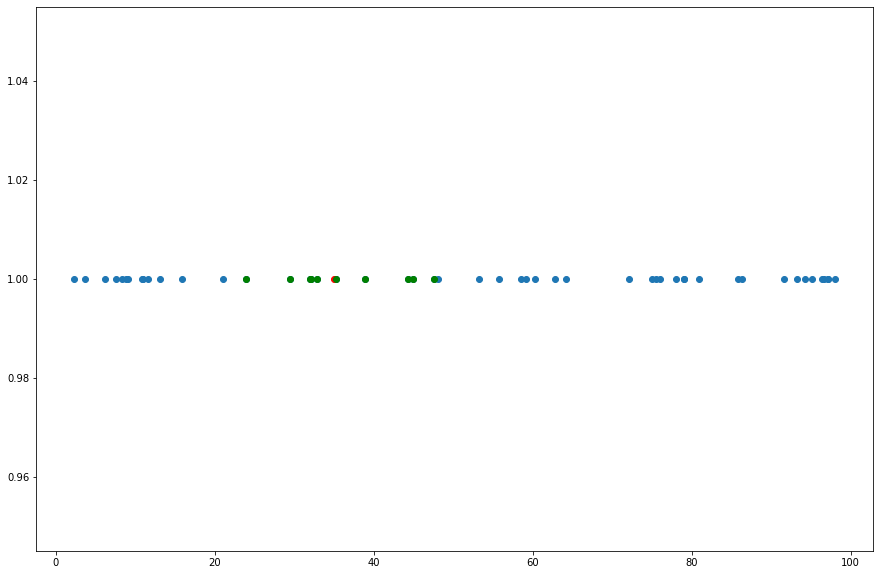

In [52]:
fig = plt.figure(figsize=(15,10))
plt.scatter(data,np.ones(len(data)))
plt.plot(key,1,'or')
plt.plot(neighbors,np.ones(k),'og')

plt.show()

In [45]:
np.abs(32.35-key)

2.6499999999999986